In [1]:
# Carga de librerías necesarias
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from random import random

> **Ejercicio 1:** Pruebe ahora a repetir el mismo proceso, pero con los datos de interpolación  
> 
> a) $(a-h,f(a-h))$ y $(a,f(a))$,
> 
> b) $(a-h,f(a-h))$ y $(a+h,f(a+h))$. 
> 
> ¿Qué fórmulas de derivación numérica se obtiene en cada caso?

In [2]:
f = sp.Function('f')                # Crea función simbólica
a,h = sp.symbols('a,h')
x_values = [a-h,a]                  # Intervalo simbólico, lista que contiene variables simbólicas
y_values = [f(x_values[0]),f(x_values[1])]
x = sp.Symbol('x')
p = (y_values[1]-y_values[0])/(x_values[1]-x_values[0])*(x-x_values[0])+y_values[0]
p.subs({x:x_values[0]}),p.subs({x:x_values[1]})
sp.diff(p,x) ## formula de diferencia regresiva

x1_values = [a-h,a+h]    
y1_values = [f(x1_values[0]),f(x1_values[1])]
p1 = (y1_values[1]-y1_values[0])/(x1_values[1]-x1_values[0])*(x-x1_values[0])+y1_values[0]
p1.subs({x:x1_values[0]}),p1.subs({x:x1_values[1]})
sp.diff(p1,x)## formula de diferencia centrada



(-f(a - h) + f(a + h))/(2*h)

> **Ejercicio 2:** Codifica una función para calcular la fórmula de derivación de tipo interpolatorio obtenida al derivar el polinomio interpolador en una lista de nodos que acepte como argumento. Añade un argumento opcional que sea el orden de la derivada a calcular. Comprueba el correcto funcionamiento de esta función con los ejemplos mostrados hasta el momento.

In [18]:
def calcula_formula_interp(x_values, orden):
    f = sp.Function('f') 
    x = sp.Symbol('x')
    # Interpreta cada nodo como expresión simbólica
    x_values = [sp.sympify(xi) for xi in x_values]
    p = 0
    for k in range(len(x_values)):
        lk = 1
        for i in range(len(x_values)):
            if i != k:
                lk *= (x - x_values[i])/(x_values[k] - x_values[i])
        p += f(x_values[k]) * lk
    for _ in range(orden):
        p = sp.diff(p, x)
    return p

# Ejemplo de uso:
print("-------------diferencia regresiva-----------------")
p = calcula_formula_interp(['a','a-h'],1)
print(p)
print("-------------diferencia progresiva-----------------")
p = calcula_formula_interp(['a','a+h'],1)
print(p)
print("-------------diferencia centrada-----------------")
p1 = calcula_formula_interp(['a-h','a+h'],1)
print(p1)



-------------diferencia regresiva-----------------
f(a)/h - f(a - h)/h
-------------diferencia progresiva-----------------
-f(a)/h + f(a + h)/h
-------------diferencia centrada-----------------
-f(a - h)/(2*h) + f(a + h)/(2*h)


> **Ejercicio 3**: Repita este procedimiento con la fórmula para la segunda derivada
> $$
> f''(a) \approx \frac{f(a+h)-2f(a)+f(a-h)}{h^2}
> $$
> y compruebe que tiene orden de aproximación 2.

In [4]:
p = calcula_formula_interp(['x1','x2','x3'],2)
p

2*f(x1)/((x1 - x2)*(x1 - x3)) + 2*f(x3)/((-x1 + x3)*(-x2 + x3)) + 2*f(x2)/((-x1 + x2)*(x2 - x3))

> **Ejercicio 4:** Utilice la función $f(x) = \dfrac{e^{\cos(x)}}{x^2+1}$ y el valor $a=1$ y compruebe que ocurre este mismo hecho. Repita el procedimiento utilizando la fórmula de diferencia centrada en lugar de la de diferencia progresiva y comenta las diferencias observadas.


In [5]:

def f(x):
    return sp.exp(sp.cos(x))/(x**2 + 1)
a= 1.

derivadaf = sp.diff(f(x),x)
valor=derivadaf.subs({x:a})
print('---------------------valor exacto--------------')
print(valor)


n=20 # Calculemos aproximaciones, mediante una fórmula numérica de la derivada primera progresiva
dersnum = np.array([(f(a+10**(-j))-f(a))/(10**(-j)) for j in range(n+1)])
print('---------------------valor aproximado cambiando h diferencia progresiva--------------')
print(dersnum)# con h desde 10^0 hasta el valor 10^(-n).
errores1=np.array(dersnum)-valor
# usando formula de la diferencia centrada
n=20 # Calculemos aproximaciones, mediante una fórmula numérica de la derivada primera progresiva
dersnum = np.array([(f(a+10**(-j))-f(a-10**(-j)))/(2*10**(-j)) for j in range(n+1)])
print('---------------------valor aproximado cambiando h diferencia centrada--------------')
print(dersnum)  # con h desde 10^0 hasta el valor 10^(-n).
errores2=np.array(dersnum)-valor

print('---------------------errores diferencia progresiva--------------')
print(errores1)
print('---------------------errores diferencia centrada--------------')
print(errores2)


---------------------valor exacto--------------
-1.58046613519819
---------------------valor aproximado cambiando h diferencia progresiva--------------
[-0.726346167289936 -1.46062768559165 -1.56825363261489 -1.57924300800927
 -1.58034380417060 -1.58045390192818 -1.58046491172126 -1.58046601583806
 -1.58046610243545 -1.58046631337783 -1.58046686848934 -1.58045798670514
 -1.58051349785637 -1.57873714101697 -1.57651669496772 -1.88737914186277 0
 0 0 0 0]
---------------------valor aproximado cambiando h diferencia centrada--------------
[0.0659583412422579 - 0.5*E -1.58243403445756 -1.58048641463901
 -1.58046633805259 -1.58046613722651 -1.58046613522034 -1.58046613518703
 -1.58046613629725 -1.58046612463991 -1.58046614684437 -1.58046631337783
 -1.58045798670514 -1.58045798670514 -1.57984736404160 -1.57651669496772
 -1.72084568816899 -0.555111512312578 0 0 0 0]
---------------------errores diferencia progresiva--------------
[0.854119967908255 0.119838449606543 0.0122125025833004
 0.00122


> **Ejercicio 5 (Implementación numérica de las fórmulas de derivación):** Implementa una función que acepte como argumentos una función en versión numérica `f`, un valor `a`, un valor `h`, un entero opcional `n` y un cuarto argumento que sea la fórmula de derivación numérica utilizada. La función deberá calcular la derivada `n`-ésima de la función `f` en el punto `a` utilizando la fórmula y el valor de `h` indicados. Las posibles fórmulas utilizadas deben incluir, al menos: diferencia regresiva, diferencia progresiva, diferencia centrada y diferencia centrada con 5 nodos. Para la función $$f(x) = \sin(\log(x^2+1)),$$ calcula el valor de $f'(-1)$, primero derivando una versión simbólica y obteniendo el valor exacto y después utilizando la función implementada con distintos valores de `h` y distintas fórmulas y comprueba las diferencias en la aproximación en cada caso.

In [19]:

def derivada_numerica(f, a, h, n=1, formula='progresiva'):
    """
    Calcula la derivada n-ésima de f en a usando la fórmula y h indicados.
    Fórmulas disponibles: 'progresiva', 'regresiva', 'centrada', 'centrada5'
    """
    if formula == 'progresiva':
        if n == 1:
            return (f(a + h) - f(a)) / h
        elif n == 2:
            return (f(a + 2*h) - 2*f(a + h) + f(a)) / h**2
    elif formula == 'regresiva':
        if n == 1:
            return (f(a) - f(a - h)) / h
        elif n == 2:
            return (f(a) - 2*f(a - h) + f(a - 2*h)) / h**2
    elif formula == 'centrada':
        if n == 1:
            return (f(a + h) - f(a - h)) / (2*h)
        elif n == 2:
            return (f(a + h) - 2*f(a) + f(a - h)) / h**2
    elif formula == 'centrada5':
        # Fórmula centrada de 5 puntos para la primera derivada
        if n == 1:
            return (f(a - 2*h) - 8*f(a - h) + 8*f(a + h) - f(a + 2*h)) / (12*h)
        # Fórmula centrada de 5 puntos para la segunda derivada
        elif n == 2:
            return (-f(a - 2*h) + 16*f(a - h) - 30*f(a) + 16*f(a + h) - f(a + 2*h)) / (12*h**2)
    else:
        raise ValueError("Fórmula no reconocida o no implementada para ese orden.")

# Ejemplo: f(x) = sin(log(x^2+1)), calcular f'(-1)
def f_num(x):
    return np.sin(np.log(x**2 + 1))

# Valor exacto simbólico
x = sp.Symbol('x')
f_sym = sp.sin(sp.log(x**2 + 1))
df_sym = sp.diff(f_sym, x)
valor_exacto = float(df_sym.subs(x, -1))

print("Valor exacto:", valor_exacto)

# Aproximaciones con distintas fórmulas y h
h = 1e-3
aprox_prog = derivada_numerica(f_num, -1, h, n=1, formula='progresiva')
aprox_reg = derivada_numerica(f_num, -1, h, n=1, formula='regresiva')
aprox_cent = derivada_numerica(f_num, -1, h, n=1, formula='centrada')
aprox_cent5 = derivada_numerica(f_num, -1, h, n=1, formula='centrada5')

print("Progresiva:", aprox_prog, "Error:", aprox_prog - valor_exacto)
print("Regresiva :", aprox_reg, "Error:", aprox_reg - valor_exacto)
print("Centrada  :", aprox_cent, "Error:", aprox_cent - valor_exacto)
print("Centrada5 :", aprox_cent5, "Error:", aprox_cent5 - valor_exacto)

Valor exacto: -0.7692389013639721
Progresiva: -0.7695581253598371 Error: -0.0003192239958650367
Regresiva : -0.7689191645420257 Error: 0.00031973682194641473
Centrada  : -0.7692386449509314 Error: 2.564130406890186e-07
Centrada5 : -0.7692389013641554 Error: -1.8329782136561334e-13


> **Ejercicio 6:** Siguiendo el modelo y el código proporcionado para la fórmula de los rectángulos a la izquierda, codifique las fórmulas compuestas de los rectángulos a la derecha y centrados. Calcule con estas dos fórmulas la aproximación de $\displaystyle\int_0^1 (x^2+1)dx$, el error cometido y represente al menos una de las dos gráficamente.

Rectángulo derecha: 1.385 Error: 0.05166666666666675
Rectángulo centrado: 1.3325 Error: 0.0008333333333332416


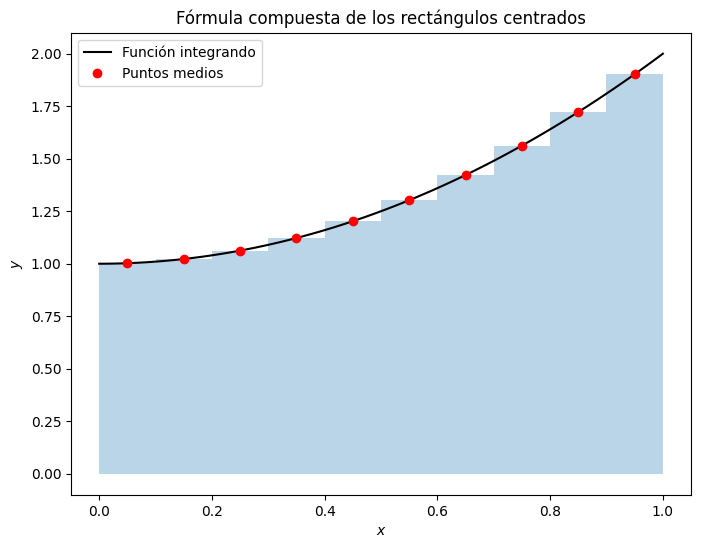

In [22]:
def formula_rectangulo_derecha(f, a, b, n):
    """Fórmula compuesta de los rectángulos a la derecha"""
    h = (b - a) / n
    nodos = np.linspace(a, b, n+1)
    return h * np.sum(f(nodos[1:]))

def formula_rectangulo_centrado(f, a, b, n):
    """Fórmula compuesta de los rectángulos centrados (punto medio)"""
    h = (b - a) / n
    nodos = np.linspace(a, b, n+1)
    # Puntos medios de cada subintervalo
    puntos_medios = (nodos[:-1] + nodos[1:]) / 2
    return h * np.sum(f(puntos_medios))

# Definimos la función y los parámetros
def func(x):
    return x**2 + 1

a, b = 0, 1
valor_exacto = sp.integrate(func(sp.Symbol('x')), (sp.Symbol('x'), a, b))

n = 10  # Puedes aumentar n para mayor precisión

# Aproximaciones
aprox_derecha = formula_rectangulo_derecha(func, a, b, n)
aprox_centrada = formula_rectangulo_centrado(func, a, b, n)

# Errores
error_derecha = abs(float(valor_exacto) - aprox_derecha)
error_centrada = abs(float(valor_exacto) - aprox_centrada)

print("Rectángulo derecha:", aprox_derecha, "Error:", error_derecha)
print("Rectángulo centrado:", aprox_centrada, "Error:", error_centrada)
import matplotlib.pyplot as plt
import matplotlib.patches as patches

num_values = 100
x_values = np.linspace(a, b, num_values)
y_values = func(x_values)
nodos = np.linspace(a, b, n+1)
puntos_medios = (nodos[:-1] + nodos[1:]) / 2
y_medios = func(puntos_medios)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x_values, y_values, 'k', label='Función integrando')
ax.plot(puntos_medios, y_medios, 'ro', label='Puntos medios')

for i in range(n):
    ax.add_patch(
        patches.Rectangle(
            (nodos[i], 0),
            nodos[i+1] - nodos[i],
            y_medios[i],
            alpha=0.3
        )
    )

ax.legend()
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Fórmula compuesta de los rectángulos centrados')
plt.show()

> **Ejercicio 7:** Implemente una función que calcule la integral de una función $f$ en el intervalo $[a,b]$ usando la fórmula de Simpson compuesta, parametrizando también el número de subintervalos utilizados (se premia la eficiencia). Represente gráficamente la fórmula de Simpson compuesta análogamente a la representación mostrada para la fórmula de los trapecios compuesta.

Simpson compuesta: 1.3333333333333333 Error: 0.0


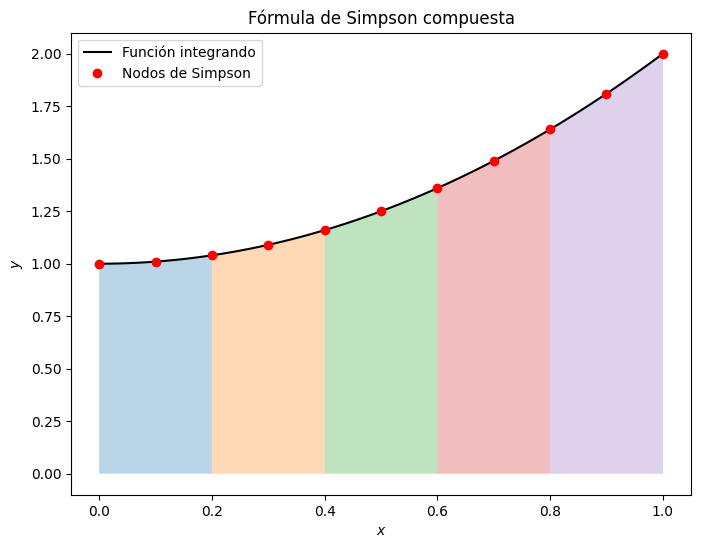

In [23]:
def formula_simpson_compuesta(f, a, b, n):
    """
    Fórmula de Simpson compuesta para la integral de f en [a, b] con n subintervalos (n par).
    """
    if n % 2 != 0:
        raise ValueError("El número de subintervalos n debe ser par para Simpson compuesta.")
    h = (b - a) / n
    nodos = np.linspace(a, b, n + 1)
    suma_pares = np.sum(f(nodos[2:n:2]))
    suma_impares = np.sum(f(nodos[1:n:2]))
    return (h / 3) * (f(a) + 2 * suma_pares + 4 * suma_impares + f(b))

# Ejemplo de uso y comparación gráfica
def func(x):
    return x**2 + 1

a, b = 0, 1
n = 10  # Debe ser par
valor_exacto = sp.integrate(func(sp.Symbol('x')), (sp.Symbol('x'), a, b))
aprox_simpson = formula_simpson_compuesta(func, a, b, n)
error_simpson = abs(float(valor_exacto) - aprox_simpson)

print("Simpson compuesta:", aprox_simpson, "Error:", error_simpson)

# Representación gráfica
num_values = 100
x_values = np.linspace(a, b, num_values)
y_values = func(x_values)
nodos = np.linspace(a, b, n + 1)
y_nodos = func(nodos)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x_values, y_values, 'k', label='Función integrando')
ax.plot(nodos, y_nodos, 'ro', label='Nodos de Simpson')

# Dibujar parábolas entre cada par de subintervalos
for i in range(0, n, 2):
    xx = np.linspace(nodos[i], nodos[i+2], 50)
    # Ajuste parabólico por 3 puntos
    coef = np.polyfit(nodos[i:i+3], y_nodos[i:i+3], 2)
    yy = np.polyval(coef, xx)
    ax.fill_between(xx, 0, yy, alpha=0.3)

ax.legend()
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Fórmula de Simpson compuesta')
plt.show()

>**Ejercicio 8:** Realice una comparativa entre los errores cometidos al aproximar funciones potencias sucesivas $x^i$, con $i=1,2,3,\ldots$ en el intervalo $[0,1]$ mediante las fórmulas de los trapecios y de Simpson compuestas con diferentes valores de $h$; e inducir de ahí, los posibles órdenes de exactitud (a partir de los valores de $i$ que proporcionen valores exactos de la integral). No deje de tener en cuenta los posibles errores de redondeo, inevitables en todo cálculo realizado con ordenador.

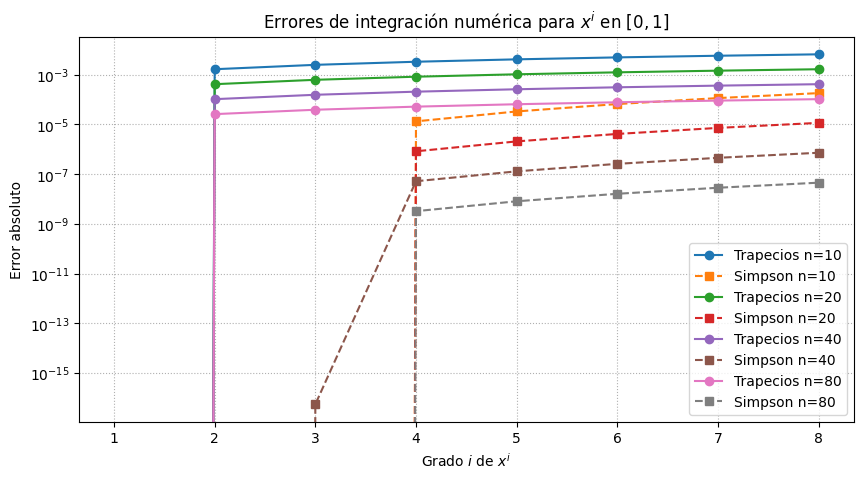

In [25]:


def formula_trapecios(f, a, b, n):
    h = (b - a) / n
    nodos = np.linspace(a, b, n + 1)
    return h/2 * (f(a) + 2 * np.sum(f(nodos[1:-1])) + f(b))

def formula_simpson_compuesta(f, a, b, n):
    if n % 2 != 0:
        raise ValueError("El número de subintervalos n debe ser par para Simpson compuesta.")
    h = (b - a) / n
    nodos = np.linspace(a, b, n + 1)
    suma_pares = np.sum(f(nodos[2:n:2]))
    suma_impares = np.sum(f(nodos[1:n:2]))
    return (h / 3) * (f(a) + 2 * suma_pares + 4 * suma_impares + f(b))

# Intervalo y grados a probar
a, b = 0, 1
grados = np.arange(1, 9)  # i = 1,2,...,8
ns = [10, 20, 40, 80]     # Diferentes particiones

errores_trapecio = []
errores_simpson = []

for n in ns:
    err_t = []
    err_s = []
    for i in grados:
        f = lambda x: x**i
        x = sp.Symbol('x')
        valor_exacto = float(sp.integrate(x**i, (x, a, b)))
        aprox_trap = formula_trapecios(f, a, b, n)
        aprox_simp = formula_simpson_compuesta(f, a, b, n if n % 2 == 0 else n+1)
        err_t.append(abs(aprox_trap - valor_exacto))
        err_s.append(abs(aprox_simp - valor_exacto))
    errores_trapecio.append(err_t)
    errores_simpson.append(err_s)

# Representación gráfica de los errores
plt.figure(figsize=(10,5))
for idx, n in enumerate(ns):
    plt.semilogy(grados, errores_trapecio[idx], 'o-', label=f'Trapecios n={n}')
    plt.semilogy(grados, errores_simpson[idx], 's--', label=f'Simpson n={n if n%2==0 else n+1}')
plt.xlabel('Grado $i$ de $x^i$')
plt.ylabel('Error absoluto')
plt.title('Errores de integración numérica para $x^i$ en $[0,1]$')
plt.legend()
plt.grid(True, which="both", ls=":")
plt.show()

>**Ejercicio 9:** Programar las técnicas de integración de Romberg y adaptativa, para después aplicarlas a la aproximación de la siguiente integral $$\int_a^b p(x)\, dx$$
>siendo  $\;a=\displaystyle\min_{0\leq i\leq 7}{d_i}$, $\;b=\displaystyle\max_{0\leq i\leq 7}{d_i}$ y
>$$p(x)=d_0 + d_1 x + d_2 x^2 + d_3 x^3+ d_4 x^4 + d_5 x^5 + d_6 x^6 + d_7 x^7 $$
>(siendo $d_0, d_1, \ldots, d_7$ los dígitos de su DNI, pasaporte o tarjeta de residente).

In [26]:


# Cambia estos dígitos por los tuyos
d = [1, 2, 3, 4, 5, 6, 7, 8]  # ejemplo

a = min(d)
b = max(d)

def p(x):
    return sum(d[k]*x**k for k in range(8))

# --- Integración de Romberg ---
def romberg(f, a, b, tol=1e-8, max_iter=10):
    R = np.zeros((max_iter, max_iter))
    n = 1
    h = b - a
    R[0,0] = h/2 * (f(a) + f(b))
    for k in range(1, max_iter):
        n *= 2
        h /= 2
        suma = sum(f(a + (2*j-1)*h) for j in range(1, n//2+1))
        R[k,0] = 0.5*R[k-1,0] + h*suma
        for j in range(1, k+1):
            R[k,j] = (4**j*R[k,j-1] - R[k-1,j-1])/(4**j - 1)
        if abs(R[k,k] - R[k-1,k-1]) < tol:
            return R[k,k]
    return R[max_iter-1, max_iter-1]

# --- Integración adaptativa de Simpson ---
def simpson_adaptativo(f, a, b, tol=1e-8, max_rec=20):
    def S(f, a, b):
        c = (a + b)/2
        return (b - a)/6 * (f(a) + 4*f(c) + f(b))
    def rec(f, a, b, eps, S_ab, rec_lvl):
        c = (a + b)/2
        S_ac = S(f, a, c)
        S_cb = S(f, c, b)
        if rec_lvl > max_rec:
            return S_ac + S_cb
        if abs(S_ac + S_cb - S_ab) < 15*eps:
            return S_ac + S_cb + (S_ac + S_cb - S_ab)/15
        return rec(f, a, c, eps/2, S_ac, rec_lvl+1) + rec(f, c, b, eps/2, S_cb, rec_lvl+1)
    S_ab = S(f, a, b)
    return rec(f, a, b, tol, S_ab, 0)

# --- Cálculo ---
romberg_result = romberg(p, a, b)
simpson_adapt_result = simpson_adaptativo(p, a, b)

print(f"Romberg: {romberg_result}")
print(f"Simpson adaptativo: {simpson_adapt_result}")

# Valor exacto (opcional, solo si quieres comparar)
import sympy as sp
x = sp.Symbol('x')
p_sym = sum(d[k]*x**k for k in range(8))
valor_exacto = sp.integrate(p_sym, (x, a, b))
print(f"Valor exacto simbólico: {valor_exacto.evalf()}")

Romberg: 19173952.0
Simpson adaptativo: 19173952.0
Valor exacto simbólico: 19173952.0000000


> **Ejercicio 10:** Calcule la misma integral del ejercicio 9 pero utilizando la orden `quad` y compare los resultados de la integración Romberg y adaptativa manuales con los de la orden `quad`.

In [27]:
from scipy.integrate import quad

# Cambia estos dígitos por los tuyos
d = [1, 2, 3, 4, 5, 6, 7, 8]  # ejemplo

a = min(d)
b = max(d)

def p(x):
    return sum(d[k]*x**k for k in range(8))

# Romberg (usa la función del ejercicio anterior)
def romberg(f, a, b, tol=1e-8, max_iter=10):
    R = np.zeros((max_iter, max_iter))
    n = 1
    h = b - a
    R[0,0] = h/2 * (f(a) + f(b))
    for k in range(1, max_iter):
        n *= 2
        h /= 2
        suma = sum(f(a + (2*j-1)*h) for j in range(1, n//2+1))
        R[k,0] = 0.5*R[k-1,0] + h*suma
        for j in range(1, k+1):
            R[k,j] = (4**j*R[k,j-1] - R[k-1,j-1])/(4**j - 1)
        if abs(R[k,k] - R[k-1,k-1]) < tol:
            return R[k,k]
    return R[max_iter-1, max_iter-1]

# Simpson adaptativo (usa la función del ejercicio anterior)
def simpson_adaptativo(f, a, b, tol=1e-8, max_rec=20):
    def S(f, a, b):
        c = (a + b)/2
        return (b - a)/6 * (f(a) + 4*f(c) + f(b))
    def rec(f, a, b, eps, S_ab, rec_lvl):
        c = (a + b)/2
        S_ac = S(f, a, c)
        S_cb = S(f, c, b)
        if rec_lvl > max_rec:
            return S_ac + S_cb
        if abs(S_ac + S_cb - S_ab) < 15*eps:
            return S_ac + S_cb + (S_ac + S_cb - S_ab)/15
        return rec(f, a, c, eps/2, S_ac, rec_lvl+1) + rec(f, c, b, eps/2, S_cb, rec_lvl+1)
    S_ab = S(f, a, b)
    return rec(f, a, b, tol, S_ab, 0)

# Cálculo con quad
valor_quad, error_quad = quad(p, a, b)

# Cálculo con Romberg y Simpson adaptativo
valor_romberg = romberg(p, a, b)
valor_simpson = simpson_adaptativo(p, a, b)

# Valor exacto simbólico
x = sp.Symbol('x')
p_sym = sum(d[k]*x**k for k in range(8))
valor_exacto = sp.integrate(p_sym, (x, a, b))

print(f"Valor exacto simbólico: {valor_exacto.evalf()}")
print(f"Romberg: {valor_romberg}")
print(f"Simpson adaptativo: {valor_simpson}")
print(f"quad: {valor_quad} (error estimado: {error_quad})")

Valor exacto simbólico: 19173952.0000000
Romberg: 19173952.0
Simpson adaptativo: 19173952.0
quad: 19173951.999999996 (error estimado: 2.1287362983457564e-07)
